In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import linregress
import numpy as np
import requests
import json
from doe_api import doe_key


In [3]:
#Academics
url = 'https://api.data.gov/ed/collegescorecard/v1/schools.json'
params = {
    'api_key': doe_key,
    'per_page': 150,
    'fields': 'id,'+
    'location.lon,'+
    'location.lat,'+
    'latest.school.name,'+
    'latest.aid.federal_loan_rate,'+
    'latest.cost.title_iv.private.all,'+
    'latest.academics.program_reporter.programs_offered,'+
    'latest.school.tuition_revenue_per_fte,'+
    'latest.student.enrollment.all,'+
    'latest.school.degrees_awarded.highest,'+
    'latest.admissions.sat_scores.midpoint.writing,'+
    'latest.admissions.sat_scores.midpoint.math,'+
    'latest.admissions.sat_scores.midpoint.critical_reading,'+
    'latest.admissions.sat_scores.average.overall,'+
    'latest.admissions.act_scores.midpoint.writing,'+
    'latest.admissions.act_scores.midpoint.math,'+
    'latest.admissions.act_scores.midpoint.english,'+
    #'latest.admissions.act_scores.midpoint.cumulative'+
    'latest.student.retention_rate.four_year.part_time_pooled,'+
    #'latest.student.retention_rate.four_year.full_time_pooled,'+
    #'latest.school.ownership'+
    #'latest.completion.completion_rate_less_than_4yr_150nt,'+
    'latest.completion.completion_rate_4yr_150_white,'+
    'latest.completion.completion_rate_4yr_150_2ormore,'+
    'latest.completion.completion_rate_4yr_150_nhpi,'+
    'latest.completion.completion_rate_4yr_150_hispanic,'+
    'latest.completion.completion_rate_4yr_150_black,'+
    'latest.completion.completion_rate_4yr_150_asian,'+
    'latest.completion.completion_rate_4yr_150_aian,'+
    #'latest.completion.completion_rate_4yr_150nt'+
    
    'page=0'
}

In [4]:
#Initialize an empty list to store the data
academics_data = []
#starting page is 0
params['page'] = 0

#loop that will loop through the page until we reach page 6
while params['page'] < 5:
    #api call
    response = requests.get(url, params=params).json()
    next_page_results = response.get("results", [])
    academics_data.extend(next_page_results)
    #to go to the next page of results
    params['page'] += 1


academics_df = pd.DataFrame(academics_data)
academics_df = academics_df.fillna(0)

In [5]:
academics_df

,latest.school.name,latest.aid.federal_loan_rate,latest.cost.title_iv.private.all,latest.academics.program_reporter.programs_offered,latest.school.tuition_revenue_per_fte,latest.student.enrollment.all,latest.school.degrees_awarded.highest,latest.admissions.sat_scores.midpoint.writing,latest.admissions.sat_scores.midpoint.math,latest.admissions.sat_scores.midpoint.critical_reading,...,latest.completion.completion_rate_4yr_150_white,latest.completion.completion_rate_4yr_150_2ormore,latest.completion.completion_rate_4yr_150_nhpi,latest.completion.completion_rate_4yr_150_hispanic,latest.completion.completion_rate_4yr_150_black,latest.completion.completion_rate_4yr_150_asian,latest.completion.completion_rate_4yr_150_aian,id,location.lat,location.lon
0,Alabama A & M University,0.6552,0.0,0.0,9243.0,0,4,414.0,460.0,475.0,...,0.3043,0.3214,0.0,0.2222,0.2805,0.0000,0.0000,100654,34.783368,-86.568502
1,University of Alabama at Birmingham,0.4401,0.0,0.0,11678.0,0,4,0.0,644.0,637.0,...,0.6276,0.5000,0.0,0.5769,0.5565,0.8354,0.6000,100663,33.505697,-86.799345
2,Amridge University,0.8423,0.0,0.0,14093.0,0,4,0.0,0.0,0.0,...,1.0000,0.0000,0.0,0.0000,0.2857,0.0000,0.0000,100690,32.362609,-86.174010
3,University of Alabama in Huntsville,0.3578,0.0,0.0,8246.0,0,4,0.0,655.0,640.0,...,0.6098,0.6000,0.0,0.6444,0.4845,0.8125,0.6667,100706,34.724557,-86.640449
4,Alabama State University,0.7637,0.0,0.0,8535.0,0,4,0.0,457.0,488.0,...,0.3636,0.0625,0.0,0.4286,0.2844,0.3333,0.0000,100724,32.364317,-86.295677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Colorado Christian University,0.4466,206.0,0.0,11648.0,0,4,0.0,0.0,0.0,...,0.6194,0.5000,0.0,0.4419,0.3333,0.5000,0.0000,126669,39.713880,-105.094560
496,Colorado College,0.2365,214.0,0.0,34550.0,0,4,0.0,0.0,0.0,...,0.8743,0.7609,0.0,0.8036,0.7368,0.8966,1.0000,126678,38.848860,-104.822697
497,Concorde Career College-Aurora,0.7053,104.0,10.0,20354.0,0,2,0.0,0.0,0.0,...,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,126687,39.718699,-104.867089
498,Colorado Mountain College,0.0935,0.0,0.0,2095.0,0,3,0.0,0.0,0.0,...,0.2353,0.2000,0.0,0.3788,0.0000,0.3333,0.3333,126711,39.546360,-107.324441


In [6]:
Data_clean = academics_df.rename(columns={
'latest.school.name' : 'School Name',
'latest.cost.title_iv.private.all' : 'Title 4 Cost Private',
'latest.academics.program_reporter.programs_offered' : 'No.of programs offered',
'latest.school.tuition_revenue_per_fte' : 'Tuition FT Enrollment in $',
'latest.student.enrollment.all': 'Enrollment',
'latest.school.degrees_awarded.highest' : 'Highest degree awarded',
'latest.admissions.sat_scores.midpoint.writing' : 'SAT Writing Midpoint',
'latest.admissions.sat_scores.midpoint.math' : 'SAT Math Midpoint',
'latest.admissions.sat_scores.midpoint.critical_reading' : 'SAT Critical Reading Midpoint',
'latest.admissions.sat_scores.average.overall' : 'SAT Average Overall',
'latest.admissions.act_scores.midpoint.writing' : 'ACT Writing Midpoint',
'latest.admissions.act_scores.midpoint.math' : ' ACT Math Midpoint',
'latest.admissions.act_scores.midpoint.english' : 'ACT English Midpoint',
'latest.student.retention_rate.four_year.part_time_pooled' : 'Retention Rate FT',
'latest.completion.completion_rate_4yr_150_white' : 'Completion Rate 4 year (White)',
'latest.completion.completion_rate_4yr_150_2ormore' : 'Completion Rate 4 year (2 Or More Races)',
'latest.completion.completion_rate_4yr_150_nhpi':'Completion Rate 4 year (Hawaian/Pacific Islander)',
'latest.completion.completion_rate_4yr_150_hispanic':'Completion Rate 4 year (Hispanic)',
'latest.completion.completion_rate_4yr_150_black' : 'Completion Rate 4 year (Black)',
'latest.completion.completion_rate_4yr_150_asian' : 'Completion Rate 4 year (Asian)',
'latest.completion.completion_rate_4yr_150_aian' : 'Completion Rate 4 year (American Indian)',
'latest.completion.completion_rate_4yr_150nt_pooled': 'General Completion Rate',
'latest.aid.federal_loan_rate' : '% of Students receiving Federal Loan',
'location.lon' : 'Longitutde',
'location.lat': 'latitude'
})

In [7]:
Data_clean.columns

Index(['School Name', '% of Students receiving Federal Loan',
       'Title 4 Cost Private', 'No.of programs offered',
       'Tuition FT Enrollment in $', 'Enrollment', 'Highest degree awarded',
       'SAT Writing Midpoint', 'SAT Math Midpoint',
       'SAT Critical Reading Midpoint', 'SAT Average Overall',
       'ACT Writing Midpoint', ' ACT Math Midpoint', 'ACT English Midpoint',
       'Retention Rate FT', 'Completion Rate 4 year (White)',
       'Completion Rate 4 year (2 Or More Races)',
       'Completion Rate 4 year (Hawaian/Pacific Islander)',
       'Completion Rate 4 year (Hispanic)', 'Completion Rate 4 year (Black)',
       'Completion Rate 4 year (Asian)',
       'Completion Rate 4 year (American Indian)', 'id', 'latitude',
       'Longitutde'],
      dtype='object')

In [8]:
Data_clean['Completion Rate 4 year (White)'] = Data_clean['Completion Rate 4 year (White)'] * 100
Data_clean['Retention Rate FT'] = Data_clean['Retention Rate FT'] * 100
Data_clean['Completion Rate 4 year (2 Or More Races)'] = Data_clean['Completion Rate 4 year (2 Or More Races)'] * 100
Data_clean['Completion Rate 4 year (Hawaian/Pacific Islander)'] = Data_clean['Completion Rate 4 year (Hawaian/Pacific Islander)'] * 100
Data_clean['Completion Rate 4 year (Hispanic)'] = Data_clean['Completion Rate 4 year (Hispanic)'] * 100
Data_clean['Completion Rate 4 year (Asian)'] = Data_clean['Completion Rate 4 year (Asian)'] * 100
Data_clean['Completion Rate 4 year (American Indian)'] = Data_clean['Completion Rate 4 year (American Indian)'] * 100
Data_clean['Completion Rate 4 year (Black)'] = Data_clean['Completion Rate 4 year (Black)'] * 100
Data_clean['% of Students receiving Federal Loan'] = Data_clean['% of Students receiving Federal Loan'] * 100


In [9]:
Data_clean['Retention Rate FT']

0      56.00
1      54.26
2       0.00
3      16.28
4      16.92
       ...  
495    32.07
496     0.00
497     0.00
498    26.09
499     0.00
Name: Retention Rate FT, Length: 500, dtype: float64

In [10]:
new_df = Data_clean["SAT Average Overall"]
new_df = new_df.drop(new_df[new_df.eq(0)].index)
new_df 

0       954.0
1      1266.0
3      1300.0
4       955.0
5      1244.0
        ...  
479    1318.0
480    1232.0
487    1040.0
491    1156.0
494    1292.0
Name: SAT Average Overall, Length: 69, dtype: float64

In [18]:
white_df = Data_clean["Completion Rate 4 year (White)"]
white_df = white_df.drop(white_df[white_df.eq(0)].index)
white_df

0       30.43
1       62.76
2      100.00
3       60.98
4       36.36
        ...  
492     45.36
494     75.55
495     61.94
496     87.43
498     23.53
Name: Completion Rate 4 year (White), Length: 184, dtype: float64

In [20]:
white_df.drop(white_df.index[69:184], inplace=True)
white_df

0       30.43
1       62.76
2      100.00
3       60.98
4       36.36
        ...  
179     30.86
182    100.00
183     75.32
185     36.30
189     66.14
Name: Completion Rate 4 year (White), Length: 69, dtype: float64

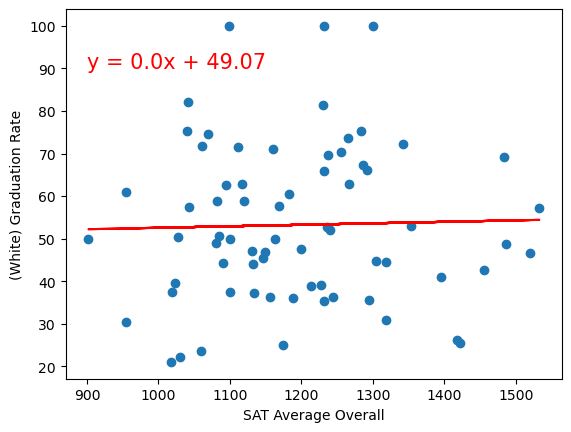

In [24]:
x_values = new_df.values
y_values = white_df.values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(900,90),fontsize=15,color="red")
plt.xlabel('SAT Average Overall')
plt.ylabel('(White) Graduation Rate')
plt.show()

In [25]:
nhis_df = Data_clean['Completion Rate 4 year (Hawaian/Pacific Islander)']
nhis_df = nhis_df.drop(nhis_df[nhis_df.eq(0)].index)
nhis_df

5       62.50
9      100.00
15      33.33
45      50.00
50      66.67
        ...  
452     50.00
458     66.67
479    100.00
492     66.67
494     40.00
Name: Completion Rate 4 year (Hawaian/Pacific Islander), Length: 79, dtype: float64

In [29]:
nhis_df.drop(nhis_df.index[69:79], inplace=True)
nhis_df

5       62.50
9      100.00
15      33.33
45      50.00
50      66.67
        ...  
396    100.00
402     75.00
413     53.33
415     83.33
416     50.00
Name: Completion Rate 4 year (Hawaian/Pacific Islander), Length: 69, dtype: float64

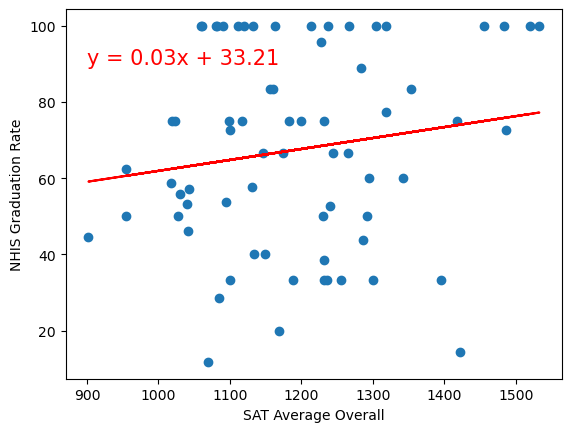

In [32]:
x_values = new_df.values
y_values = nhis_df.values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(900,90),fontsize=15,color="red")
plt.xlabel('SAT Average Overall')
plt.ylabel('NHIS Graduation Rate')
plt.show()

In [33]:
black_df = Data_clean['Completion Rate 4 year (Black)']
black_df = black_df.drop(black_df[black_df.eq(0)].index)
black_df

0      28.05
1      55.65
2      28.57
3      48.45
4      28.44
       ...  
491    54.69
492    45.00
494    67.96
495    33.33
496    73.68
Name: Completion Rate 4 year (Black), Length: 172, dtype: float64

In [34]:
black_df.drop(black_df.index[69:172], inplace=True)
black_df

0       28.05
1       55.65
2       28.57
3       48.45
4       28.44
        ...  
183     62.50
185     34.43
189     41.56
190     42.86
192    100.00
Name: Completion Rate 4 year (Black), Length: 69, dtype: float64

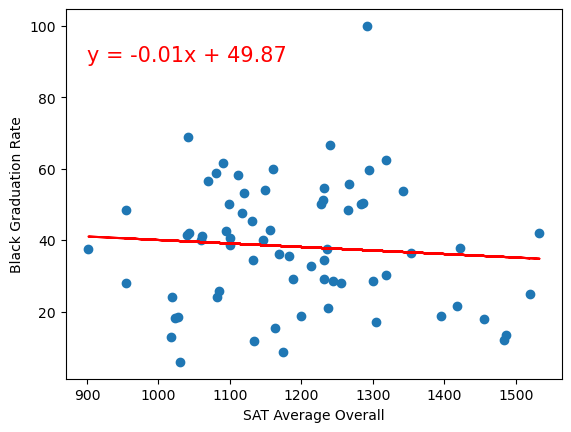

In [35]:
x_values = new_df.values
y_values = black_df.values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(900,90),fontsize=15,color="red")
plt.xlabel('SAT Average Overall')
plt.ylabel('Black Graduation Rate')
plt.show()

In [36]:
asian_df = Data_clean['Completion Rate 4 year (Asian)']
asian_df = asian_df.drop(asian_df[asian_df.eq(0)].index)
asian_df

1      83.54
3      81.25
4      33.33
5      79.12
8      22.22
       ...  
492    44.44
494    78.70
495    50.00
496    89.66
498    33.33
Name: Completion Rate 4 year (Asian), Length: 162, dtype: float64

In [37]:
asian_df.drop(asian_df.index[69:162], inplace=True)
asian_df

1      83.54
3      81.25
4      33.33
5      79.12
8      22.22
       ...  
203    79.94
204    60.41
205    80.19
206    64.63
207    66.18
Name: Completion Rate 4 year (Asian), Length: 69, dtype: float64

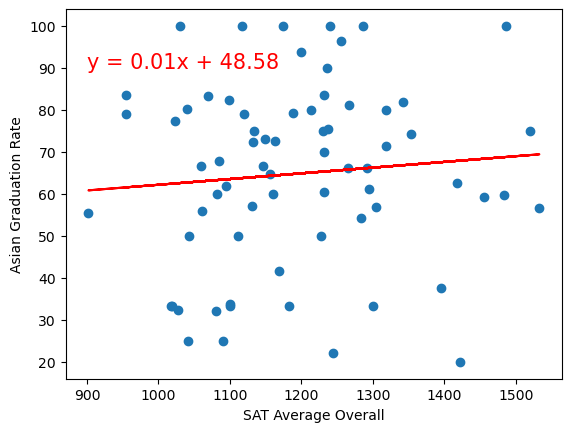

In [38]:
x_values = new_df.values
y_values = asian_df.values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(900,90),fontsize=15,color="red")
plt.xlabel('SAT Average Overall')
plt.ylabel('Asian Graduation Rate')
plt.show()

In [43]:
ai_df = Data_clean['Completion Rate 4 year (American Indian)']
ai_df = ai_df.drop(ai_df[ai_df.eq(0)].index)
ai_df

1       60.00
3       66.67
5       62.07
8       40.00
9       79.17
        ...  
480    100.00
487     33.33
494     31.25
496    100.00
498     33.33
Name: Completion Rate 4 year (American Indian), Length: 111, dtype: float64

In [40]:
ai_df.drop(ai_df.index[69:111], inplace=True)
ai_df

1       60.00
3       66.67
5       62.07
8       40.00
9       79.17
        ...  
214    100.00
216     66.67
217    100.00
223     50.00
240     80.00
Name: Completion Rate 4 year (American Indian), Length: 69, dtype: float64

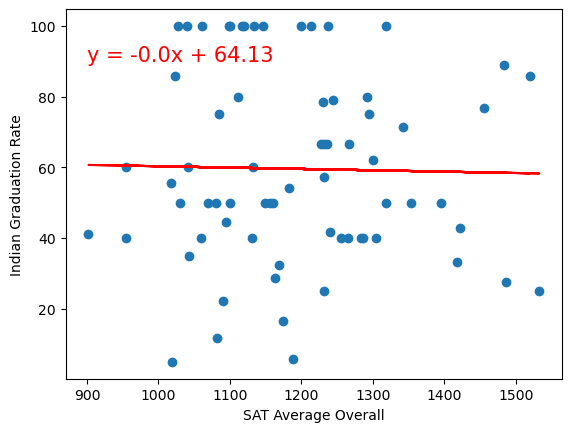

In [42]:
x_values = new_df.values
y_values = ai_df.values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(900,90),fontsize=15,color="red")
plt.xlabel('SAT Average Overall')
plt.ylabel('Indian Graduation Rate')
plt.show()

In [44]:
mr_df = Data_clean['Completion Rate 4 year (2 Or More Races)']
mr_df = mr_df.drop(mr_df[mr_df.eq(0)].index)
mr_df

0      32.14
1      50.00
3      60.00
4       6.25
5      66.49
       ...  
492    47.79
494    69.76
495    50.00
496    76.09
498    20.00
Name: Completion Rate 4 year (2 Or More Races), Length: 154, dtype: float64

In [46]:
mr_df.drop(mr_df.index[69:154], inplace=True)
mr_df

0      32.14
1      50.00
3      60.00
4       6.25
5      66.49
       ...  
203    75.50
204    48.75
205    75.19
206    44.12
207    56.00
Name: Completion Rate 4 year (2 Or More Races), Length: 69, dtype: float64

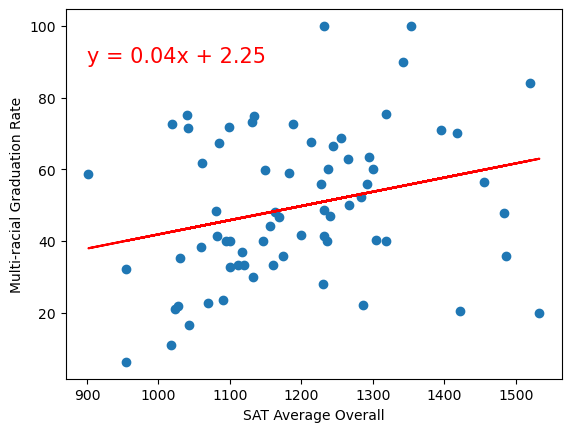

In [48]:
x_values = new_df.values
y_values = mr_df.values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(900,90),fontsize=15,color="red")
plt.xlabel('SAT Average Overall')
plt.ylabel('Multi-racial Graduation Rate')
plt.show()